# Carry Tables

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import random
import math
import pickle
from tqdm.notebook import tqdm_notebook
import sys
sys.path.append('../')
import fn

In [2]:
%load_ext autoreload
%autoreload 2

## Display Carry Tables

In [3]:
b=4 #modulus

basic_table=1*(np.add.outer(np.arange(b),np.arange(b))>=b)
alt_table=np.array([[0,0,0,0],
                    [0,3,3,3],
                    [0,3,3,0],
                    [0,3,0,0]])

### Basic Table, depth $\in [1:3]$

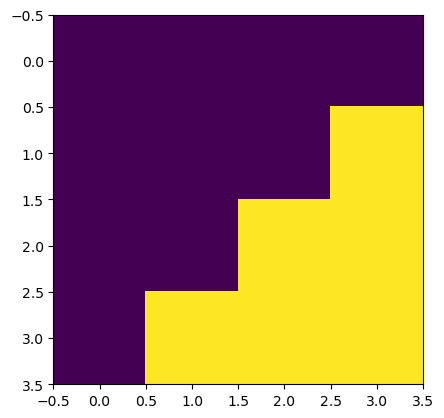

In [172]:
plt.imshow(fn.construct_product_table(basic_table, 1))

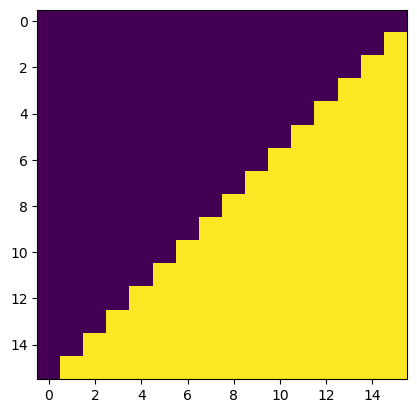

In [174]:
plt.imshow(fn.construct_product_table(basic_table, 2))

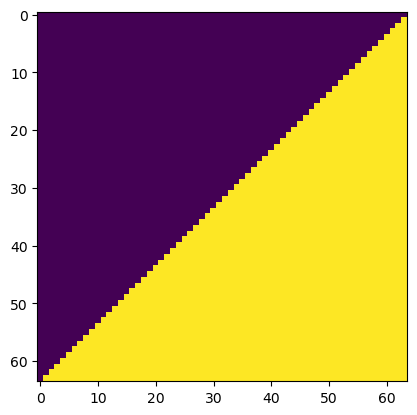

In [175]:
plt.imshow(fn.construct_product_table(basic_table, 3))

### Alternative Table, depth $\in [1:4]$

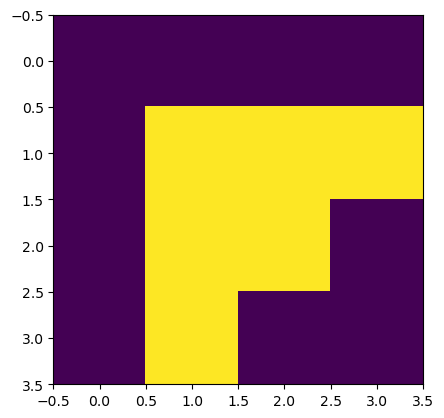

In [176]:
plt.imshow(fn.construct_product_table(alt_table, 1))

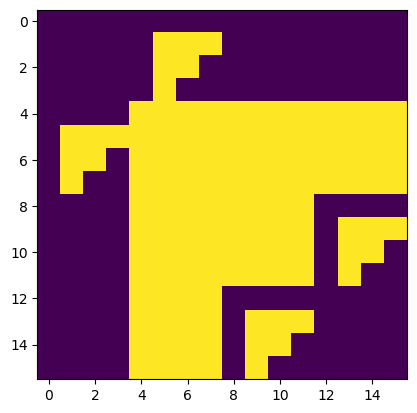

In [177]:
plt.imshow(fn.construct_product_table(alt_table, 2))

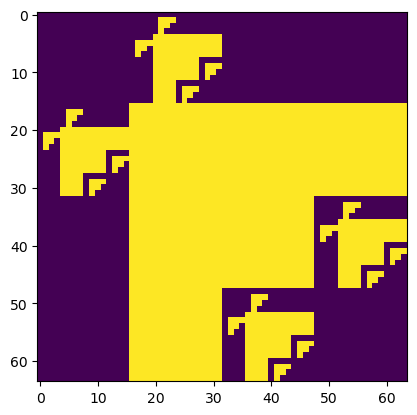

In [178]:
plt.imshow(fn.construct_product_table(alt_table, 3))

## Compare Carry Tables

### Find alternative cocycles

In [204]:
((0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)) in tables4.keys()

True

In [12]:
tables2 = fn.construct_tables(2, depth=1)

Add cocycles:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
tables3 = fn.construct_tables(3, depth=1)

Add cocycles:   0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
tables4 = fn.construct_tables(4, depth=1)

Add cocycles:   0%|          | 0/16 [00:00<?, ?it/s]

In [15]:
tables5 = fn.construct_tables(5, depth=1)

Add cocycles:   0%|          | 0/125 [00:00<?, ?it/s]

In [17]:
tables6 = fn.construct_tables(6)

Add cocycles:   0%|          | 0/1296 [00:00<?, ?it/s]

In [18]:
tables7 = fn.construct_tables(7)

Add cocycles:   0%|          | 0/16807 [00:00<?, ?it/s]

In [20]:
tables8 = fn.construct_tables(8)

Add cocycles:   0%|          | 0/262144 [00:00<?, ?it/s]

In [22]:
all_tables = {
    2: tables2,
    3: tables3,
    4: tables4,
    5: tables5,
    6: tables6,
    7: tables7,
    8: tables8,
}

### Plot their carry tables

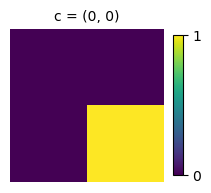

In [23]:
fn.show_tables(tables2, 2, depth=1)

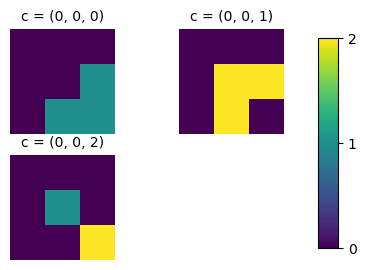

In [24]:
fn.show_tables(tables3, 3, depth=1)

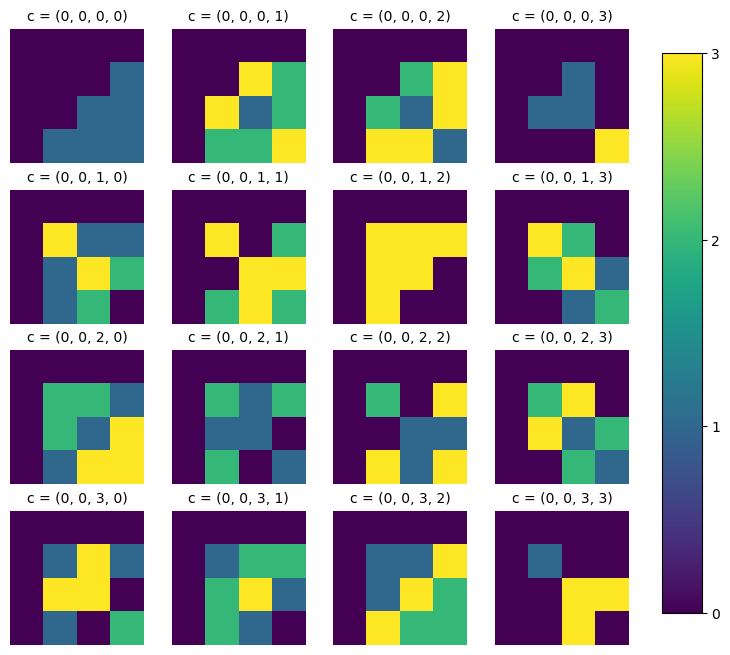

In [25]:
fn.show_tables(tables4, 4, depth=1)

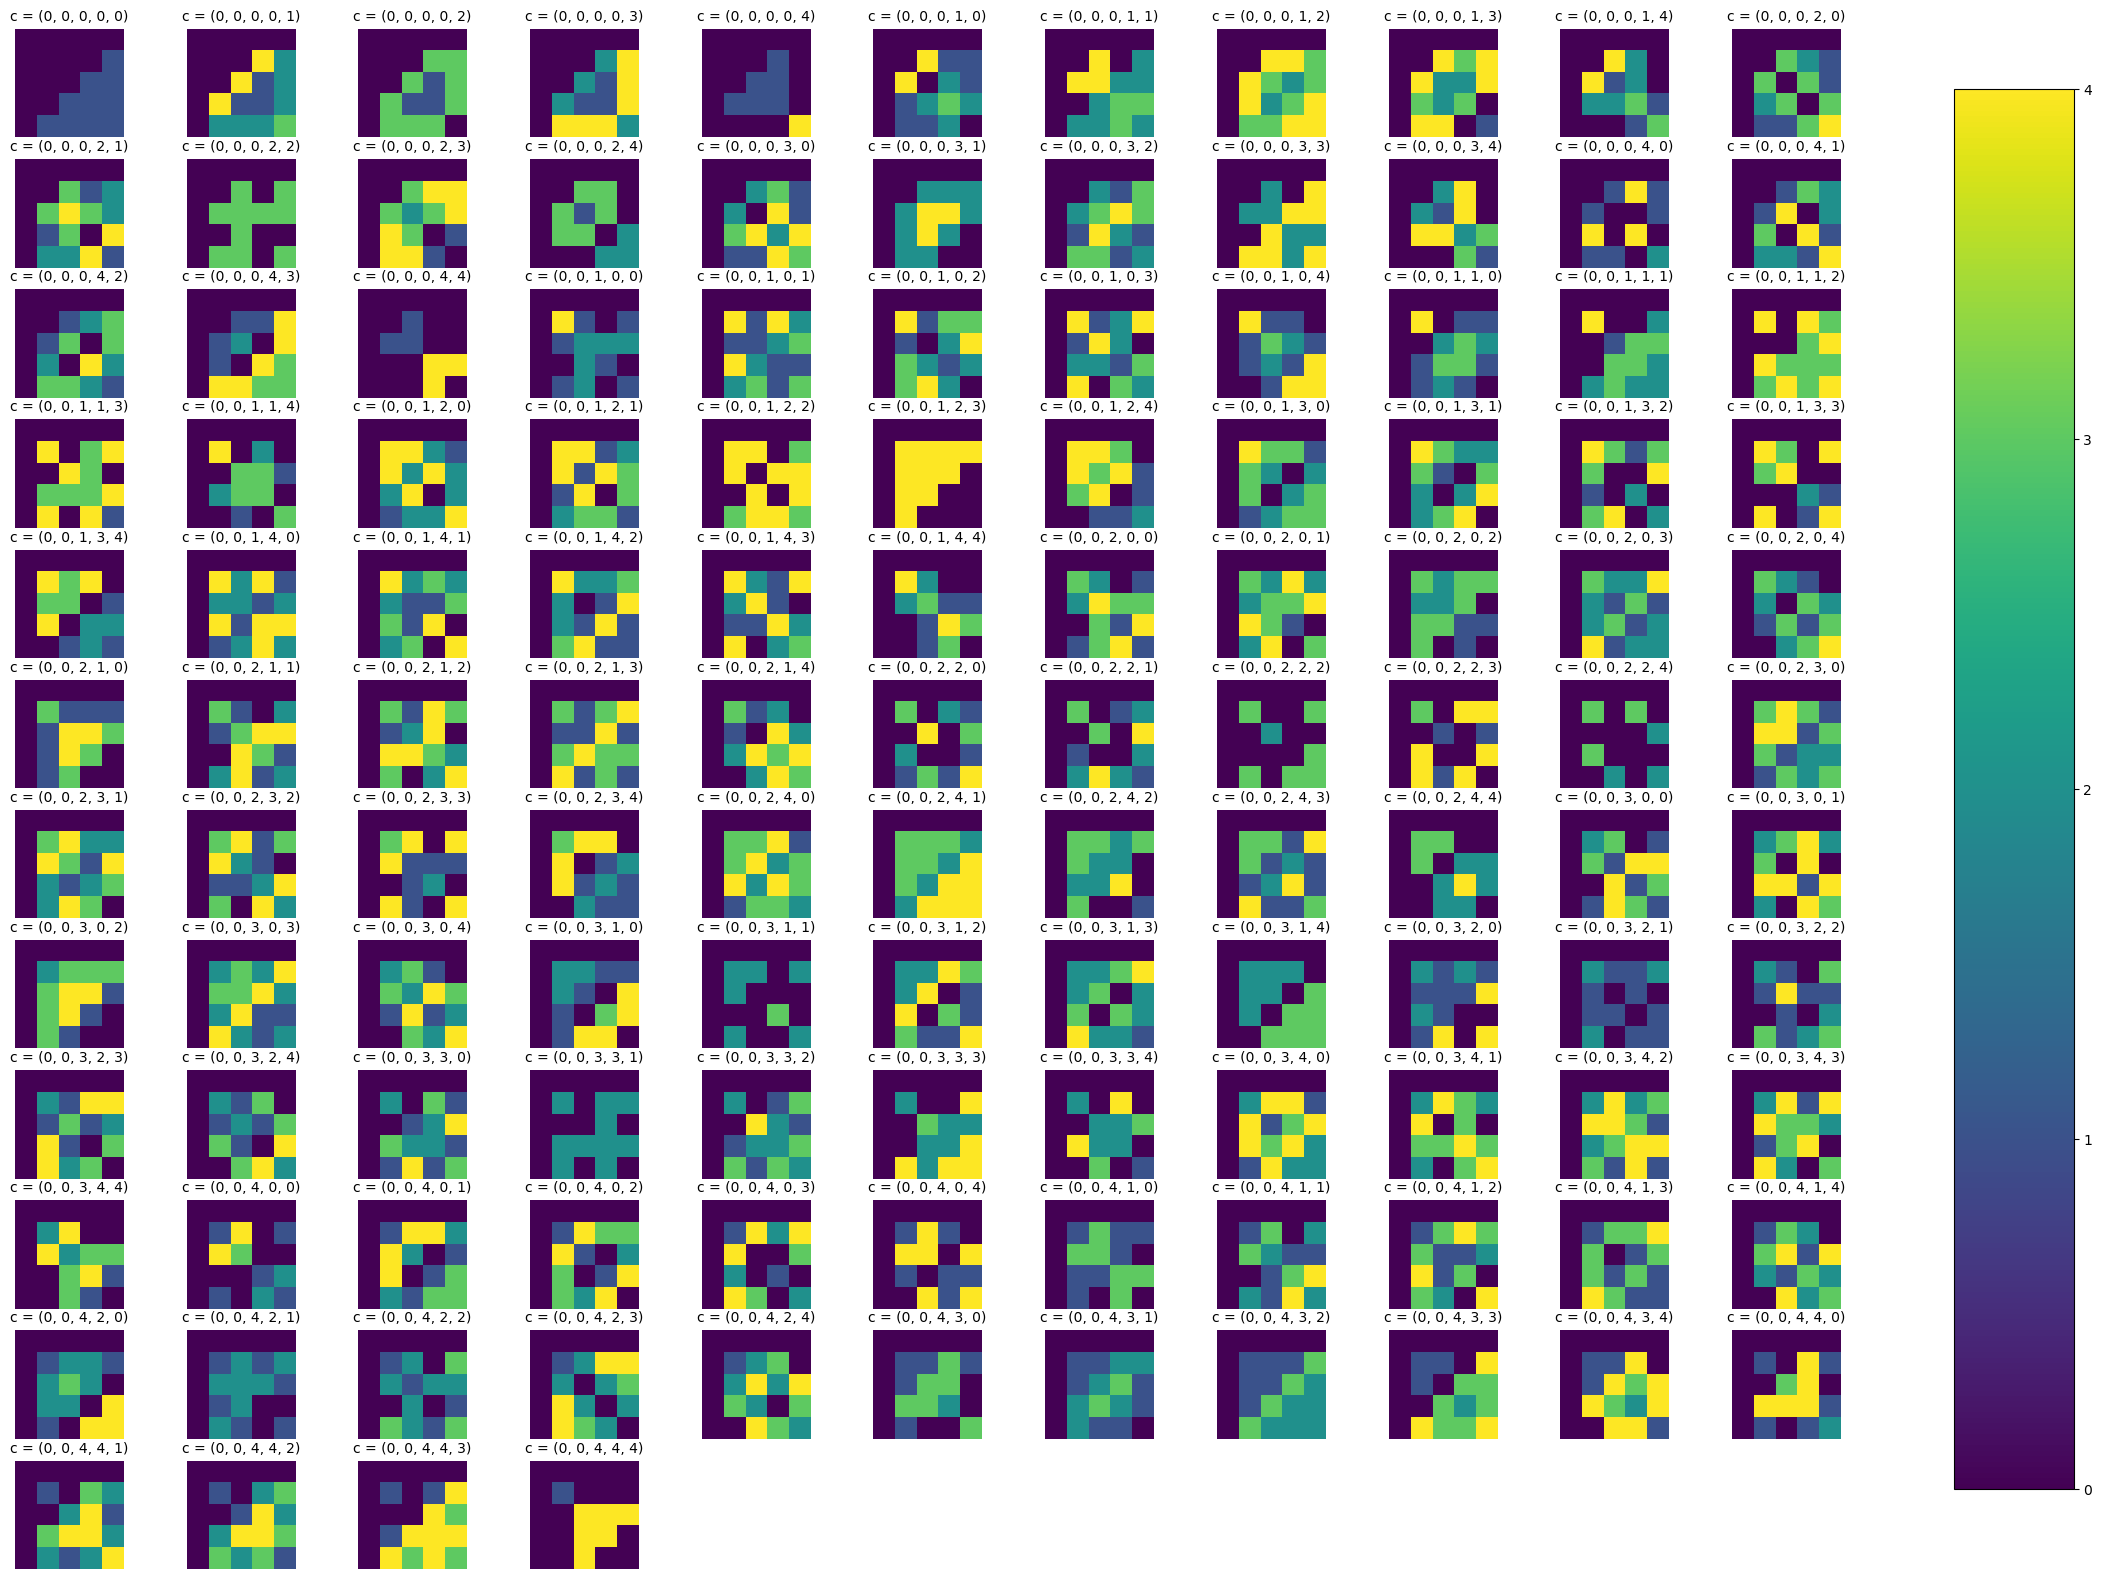

In [26]:
fn.show_tables(tables5, 5, depth=1)

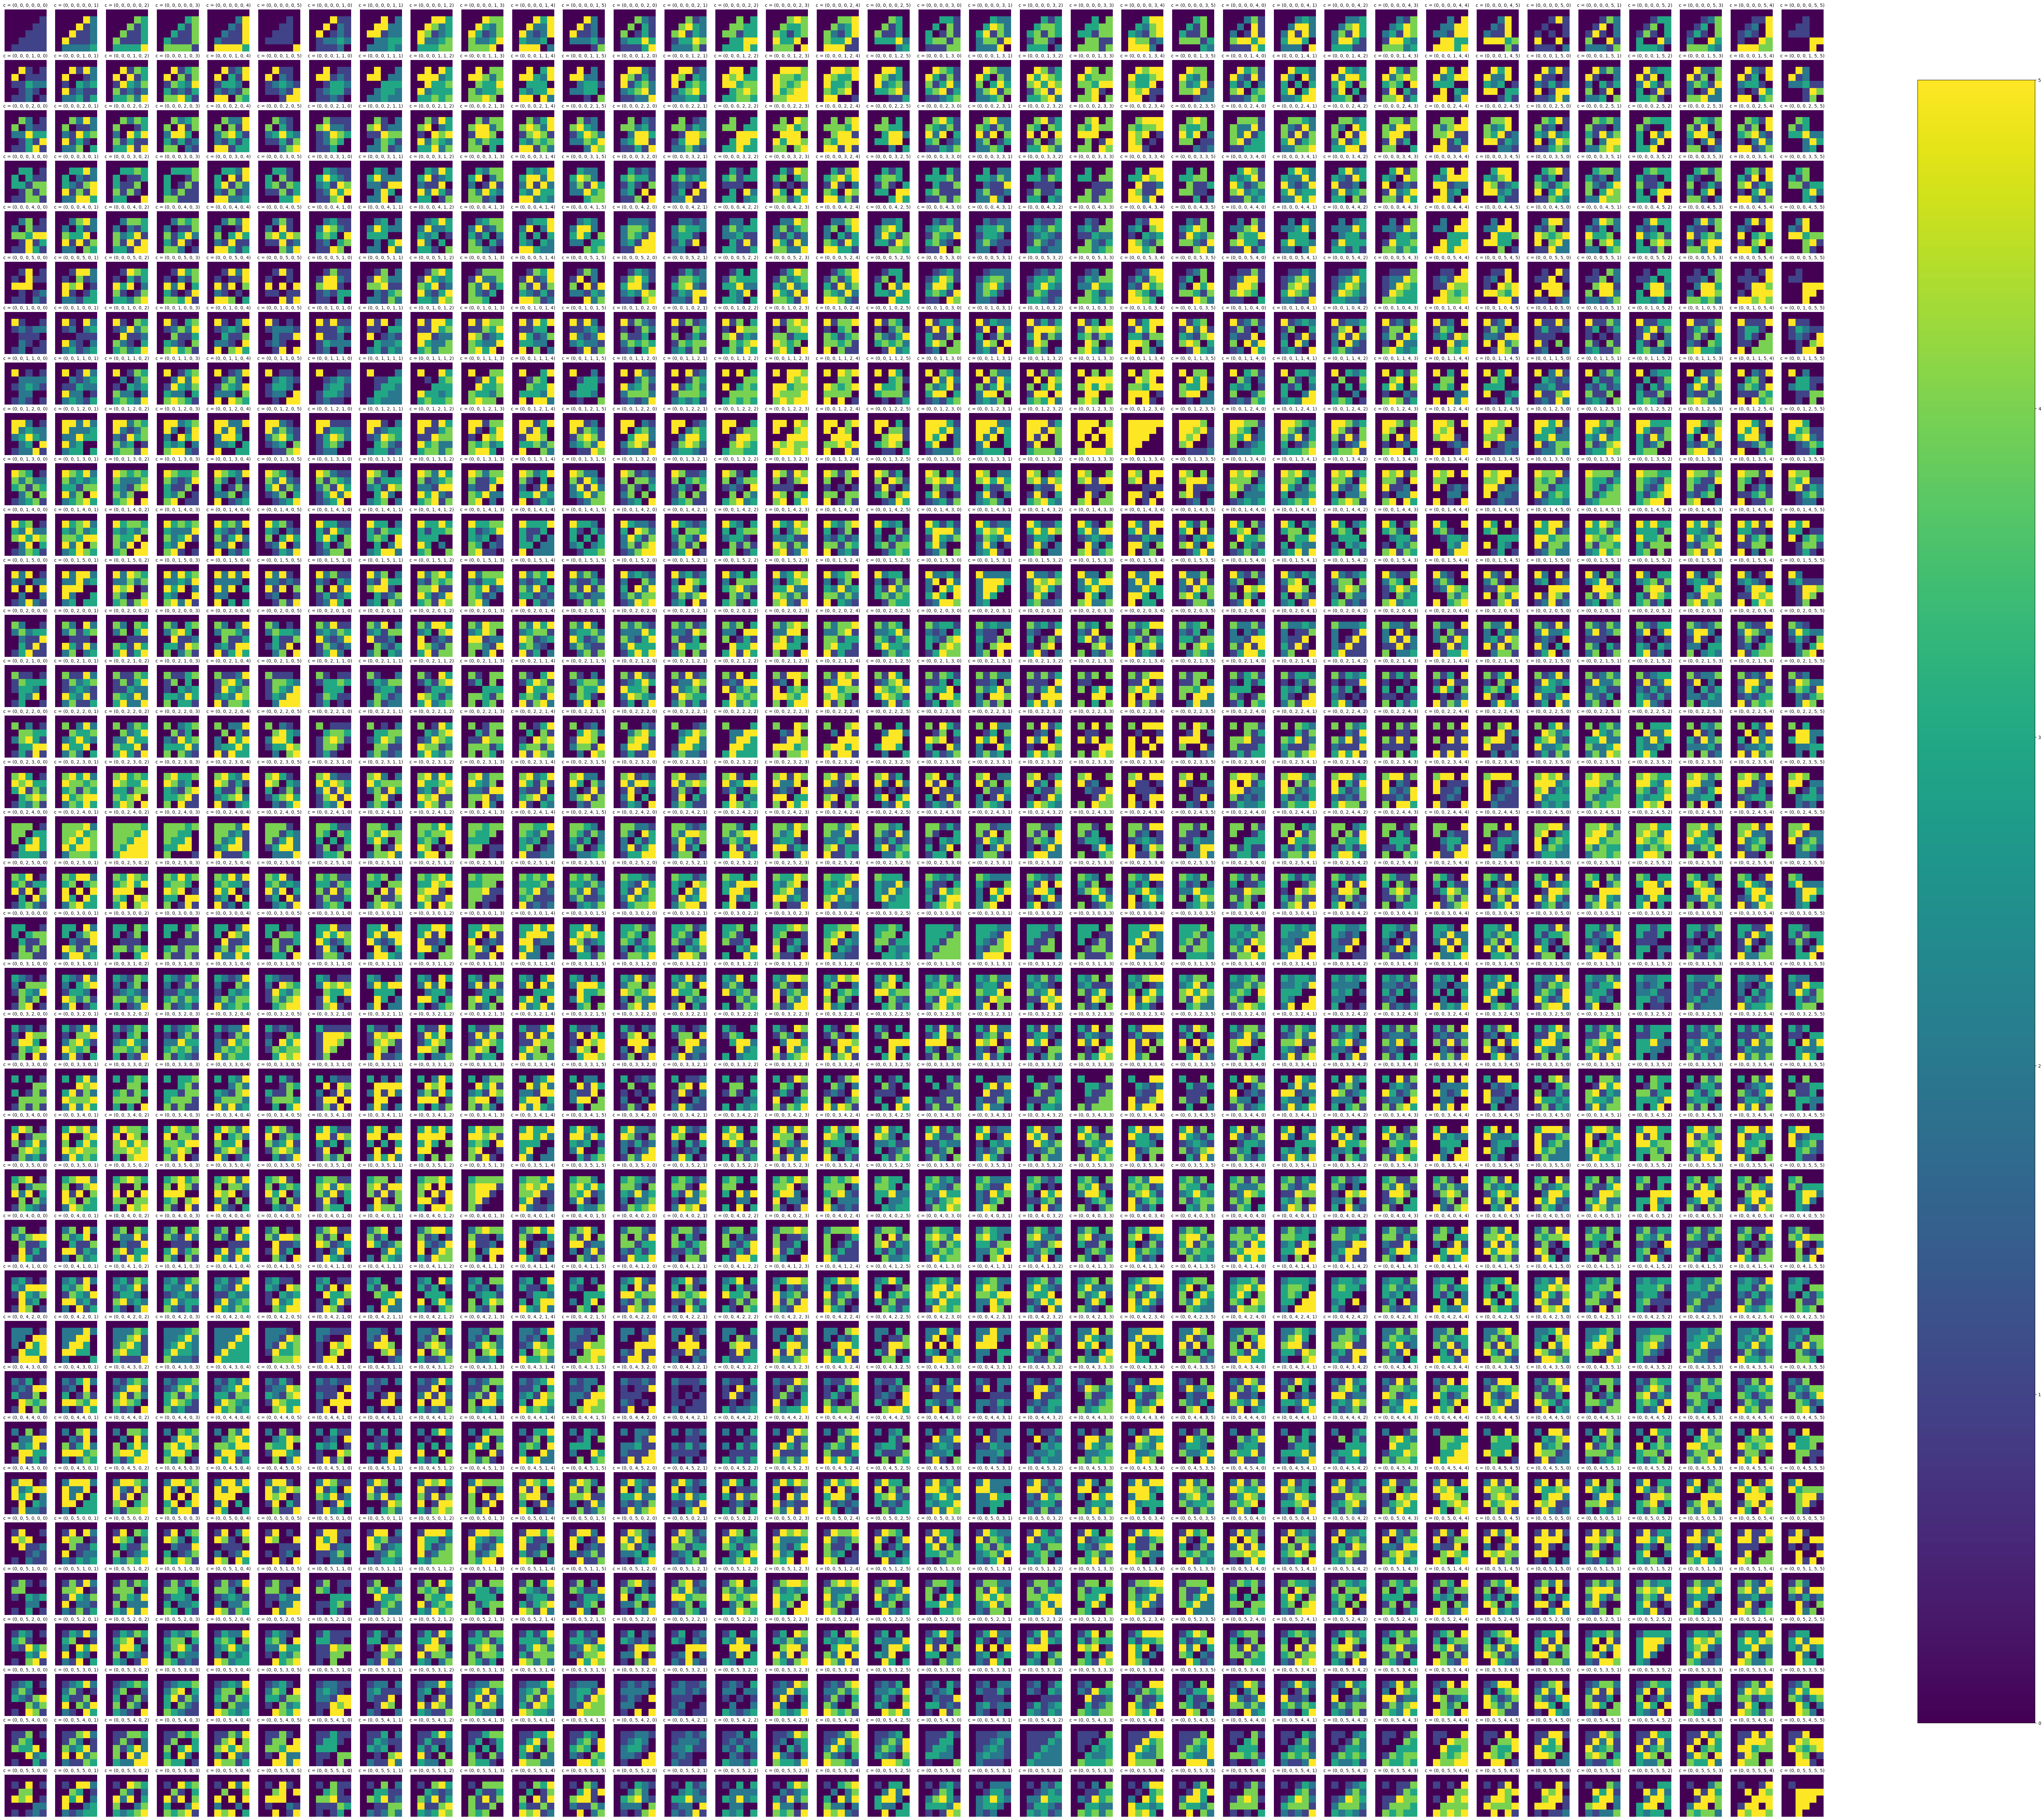

In [190]:
fn.show_tables(tables6, 6, depth=1)

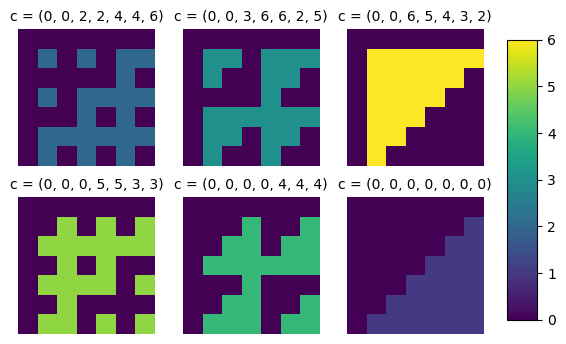

In [53]:
fn.show_tables(all_tables[7], 7, depth=1)

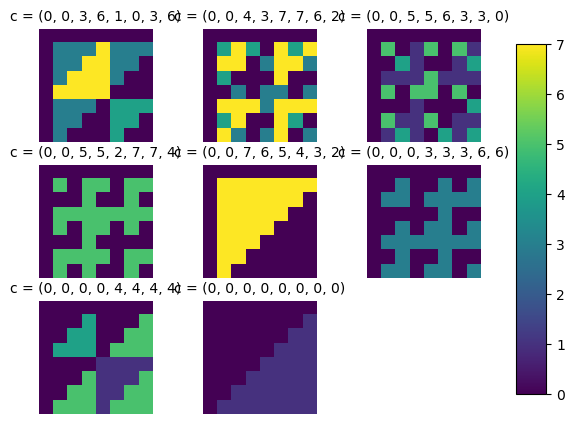

In [54]:
fn.show_tables(all_tables[8], 8, depth=1)

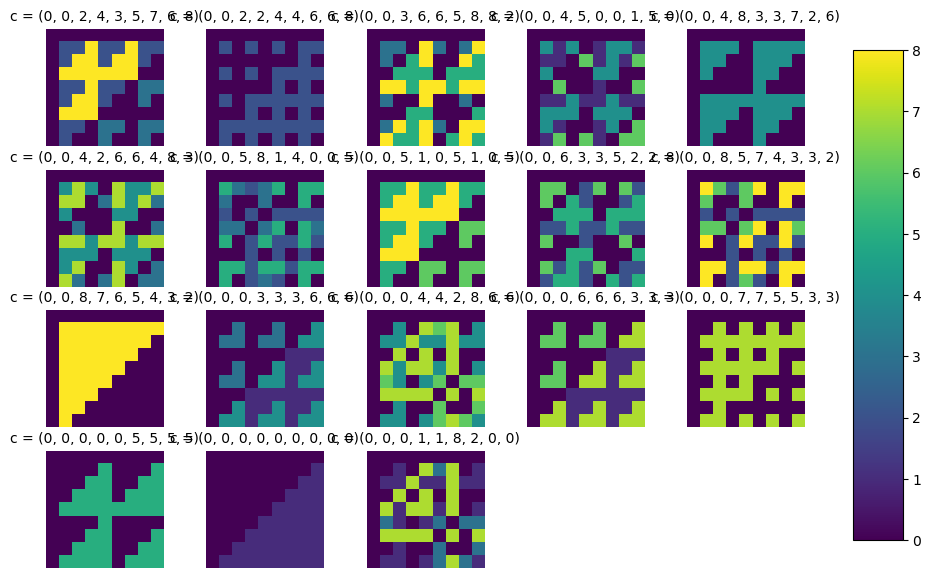

In [55]:
fn.show_tables(all_tables[9], 9, depth=1)

### Compute fraction of zeros, number of unique digits, and estimated box-counting dimension for each table

In [32]:
with open('pickles/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [33]:
with open('pickles/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

In [34]:
with open('pickles/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

### Plot fraction of zeros, number of unique digits, and estimated box-counting dimension

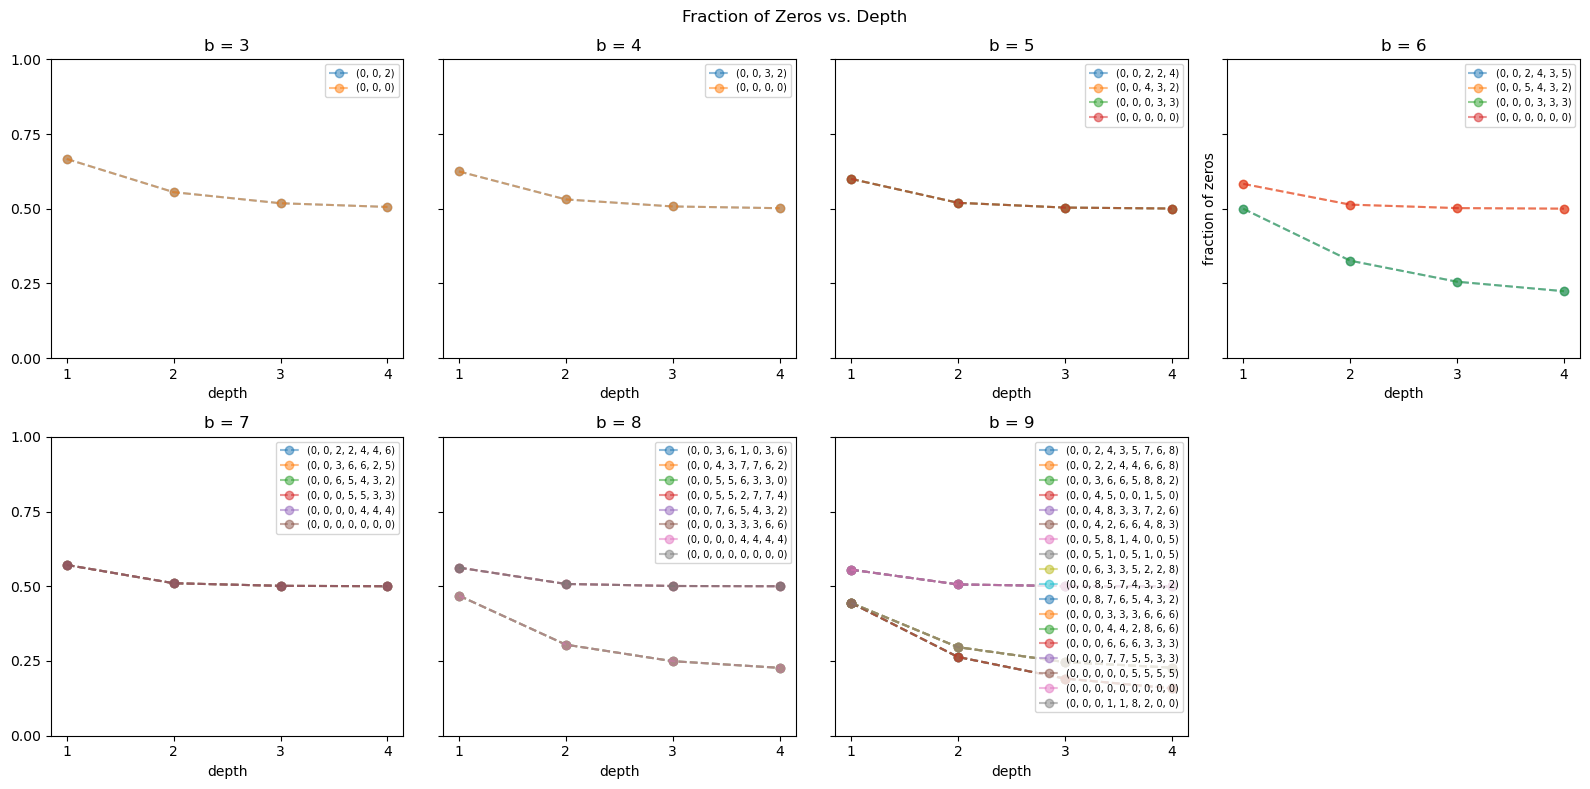

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(frac_zeros_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 1, 5))
        if (i == 3) or (i == 7):
            ax.set_ylabel('fraction of zeros')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Fraction of Zeros vs. Depth')
plt.tight_layout()

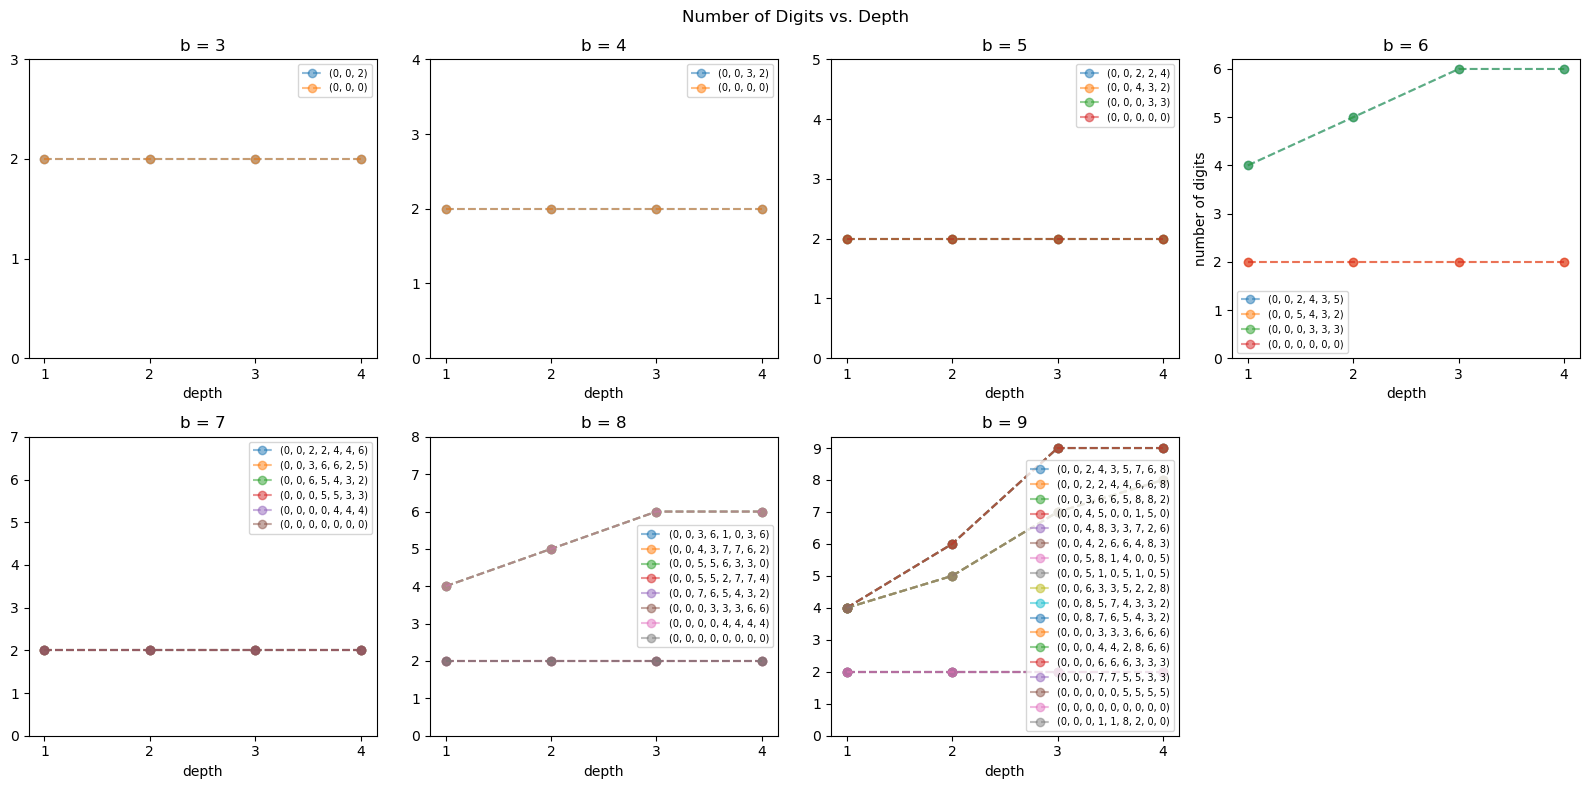

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(num_digits_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_yticks(range(i+4))
        ax.set_xlabel('depth')
        if (i == 3) or (i == 7):
            ax.set_ylabel('number of digits')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Number of Digits vs. Depth')
plt.tight_layout()

In [115]:
cs = list(all_tables[6].keys())

In [118]:
alt_c = ((0, 0, 2, 4, 3, 5),
  (0, 1, 4, 1, 1, 4),
  (0, 2, 0, 4, 5, 3),
  (0, 3, 2, 1, 3, 2),
  (0, 4, 4, 4, 1, 1),
  (0, 5, 0, 1, 5, 0))

In [120]:
std_c = ((0, 0, 0, 0, 0, 0),
  (0, 1, 2, 3, 4, 5),
  (0, 2, 4, 0, 2, 4),
  (0, 3, 0, 3, 0, 3),
  (0, 4, 2, 0, 4, 2),
  (0, 5, 4, 3, 2, 1))

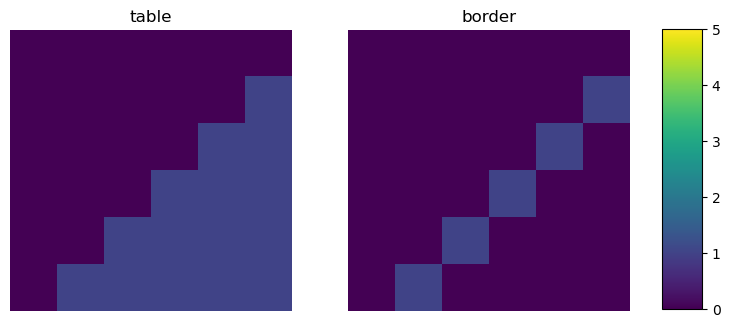

In [142]:
fn.plot_border(all_tables[6][std_c])

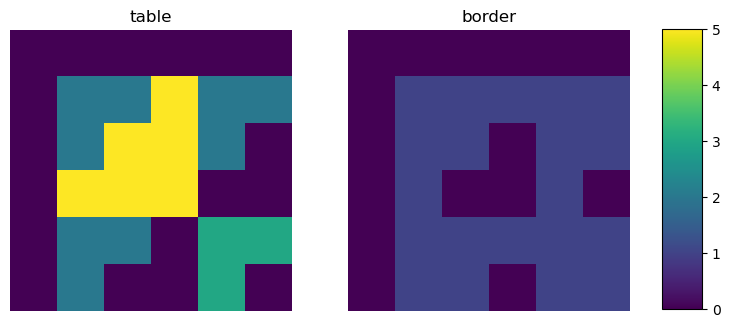

In [143]:
fn.plot_border(all_tables[6][alt_c])

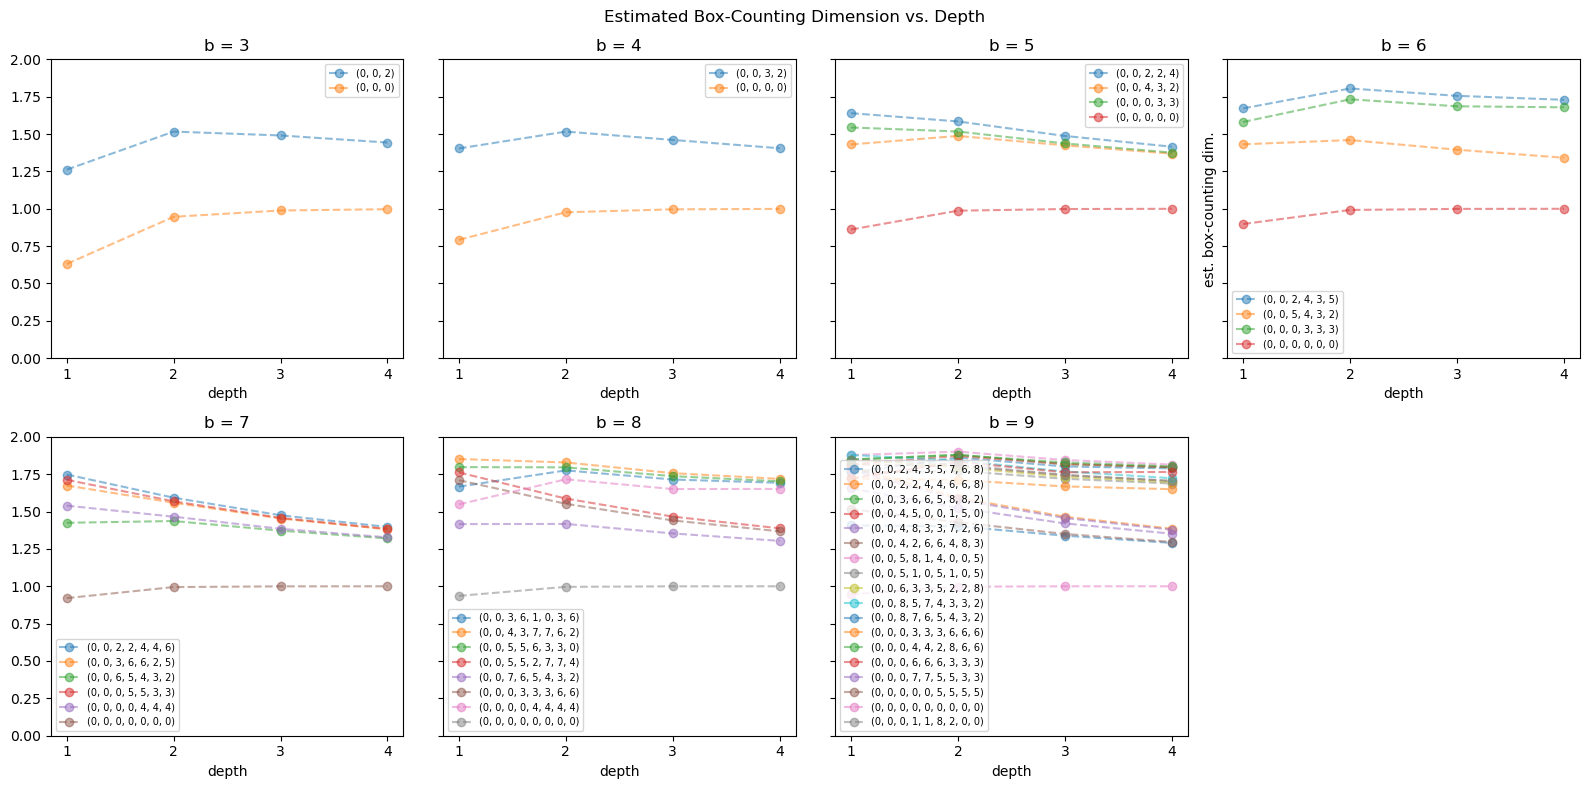

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(est_dim_box_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 2, 9))
        if (i == 3) or (i == 7):
            ax.set_ylabel('est. box-counting dim.')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()

### Check that recursive tables are still cocycles

In [66]:
bases = list(all_tables.keys())

In [67]:
bases = bases[:5]

In [ ]:
for b in tqdm_notebook(bases):
    for c in all_tables[b].keys():
        table = all_tables[b][c]
        for depth in range(1, 4):
            if (fn.assert_cocycle(table, depth=depth) == False):
                print(b, c, depth)

In [ ]:
b = 6
for c in tqdm_notebook(all_tables[b].keys()):
    table = all_tables[b][c]
    if (fn.assert_cocycle(table, depth=4) == False):
        print(b, c, depth)

### Derive Standard Carry (Tabular)

In [27]:
def derive_standard_carry(b):
    f = np.empty((b, b), dtype='int')
    for n in range(b):
        for m in range(b):
            f[n, m] = ((n + m - (n+m)%b) / b) % b
    return(f)

In [28]:
print(derive_standard_carry(4))

[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 1]
 [0 1 1 1]]


In [44]:
def derive_recursive_standard_carry(b):
    fp = np.empty((b**2, b**2), dtype='float')
    f = derive_standard_carry(b)
    tuples = list(product(*[range(b)]*(2)))
    for i in range(b**2):
        (n2, n1) = tuples[i]
        for j in range(b**2):
            (m2, m1) = tuples[j]
            fp[i, j] = ( ((n1 + m1 - (n1+m1)%b) / b**2)
                         + ((n2 + m2 - (n2+m2+f[n1,m1])%b) / b) ) % b
    return fp.astype('int')

In [45]:
print(derive_recursive_standard_carry(4))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


#### WRONG

In [146]:
def construct_recursive_coboundary(b, c):
    dc = np.zeros((b**2, b**2), dtype='float')
    f = derive_recursive_standard_carry(b)
    tuples = list(product(*[range(b)]*(2)))
    for i in range(b**2):
        (n2, n1) = tuples[i]
        for j in range(b**2):
            (m2, m1) = tuples[j]
            dc[i, j] = (c[i] + c[j] - c[(i+j)%(b**2)]) % (b**2)
    # dc = tuple(map(tuple, dc))
    return dc.astype('int')

In [147]:
b = 4
c = [0] + list((b**2 * np.random.sample(b**2 - 1)).astype('int'))
dc = construct_recursive_coboundary(b, c)

In [148]:
print(dc)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12 14 15  0  2  5  9  5 12 13 10  1  6  8  0]
 [ 0 14  1  3  6 11  2  2  5 13 11 15 11  2 12  4]
 [ 0 15  3  7 13  6  9  0  4  9 14  7  5  4 14  2]
 [ 0  0  6 13  7 12  6 14 15 11  5  0  6  5 11  1]
 [ 0  2 11  6 12  8  3  8  0  1 13  0  6  1  9  0]
 [ 0  5  2  9  6  3 11  7  4  7 11 14  0 13  6 14]
 [ 0  9  2  0 14  8  7  8  7  2  6  5  9  7  1 11]
 [ 0  5  5  4 15  0  4  7 14  9  9 10 15 14 10  7]
 [ 0 12 13  9 11  1  7  2  9  0  2  4 10 11 10 11]
 [ 0 13 11 14  5 13 11  6  9  2  5  8  0  4  7  4]
 [ 0 10 15  7  0  0 14  5 10  4  8 13  8  0 15  3]
 [ 0  1 11  5  6  6  0  9 15 10  0  8  7 11  1  6]
 [ 0  6  2  4  5  1 13  7 14 11  4  0 11  6 13 15]
 [ 0  8 12 14 11  9  6  1 10 10  7 15  1 13  1 10]
 [ 0  0  4  2  1  0 14 11  7 11  4  3  6 15 10  8]]


In [149]:
def construct_recursive_table(dc):
    standard_table = derive_recursive_standard_carry(b)
    table = np.zeros((b**2, b**2), dtype='float')
    for i in range(b**2):
        for j in range(b**2):
            table[i, j] = (standard_table[i, j] + dc[i, j]) % b
    return table.astype('int')

In [150]:
table = construct_recursive_table(dc)

In [151]:
fn.assert_cocycle(table)

False

### Derive carry table corresponding to section s

In [261]:
def derive_carry(b, s):
    f = np.empty((b, b), dtype='int')
    for n in range(b):
        for m in range(b):
            f[n, m] = ((s[n] + s[m] - s[(n+m)%b]) / b) % b
    return f

In [109]:
table = fn.construct_table(b, c)

In [110]:
print(table)

[[0 0 0]
 [0 1 0]
 [0 0 2]]


In [129]:
dc = tuple(map(tuple, arr))

In [113]:
fn.assert_cocycle(table, depth=2)

(2, 2) (0, 2, 2)


False

In [103]:
b = 3
s = list(range(b))
c = [0, 1, 1]
for i in s:
    s[i] += b*c[i]
derive_carry(b, s)

[[0 0 0]
 [0 1 0]
 [0 0 2]]


In [80]:
all_tables[4].keys()

dict_keys([((0, 0, 3, 2), (0, 1, 1, 1), (0, 2, 3, 0), (0, 3, 1, 3)), ((0, 0, 0, 0), (0, 1, 2, 3), (0, 2, 0, 2), (0, 3, 2, 1))])

### Find All Cross-Sections Corresponding to each Carry Table

### Check how the recursive tables compare in terms of isomorphisms of groups

In [42]:
def generate_cycle(b, c, step):
    depth = len(step)
    place = fn.RecursiveGrpElt((0, 0), all_tables[b][c])
    step = fn.RecursiveGrpElt(step, all_tables[b][c])
    cycle = [place.vals]
    for t in range(b**depth):
        place += step
        cycle.append(place.vals)
    cycle = [place[-depth:] for place in cycle]
    return cycle

In [47]:
b = 6
c = ((0, 0, 0, 0, 0, 0), (0, 1, 2, 3, 4, 5), (0, 2, 4, 0, 2, 4), (0, 3, 0, 3, 0, 3), (0, 4, 2, 0, 4, 2), (0, 5, 4, 3, 2, 1))
step = (0, 1)
normal = generate_cycle(b, c, step)

In [52]:
c = ((0, 0, 2, 4, 3, 5), (0, 1, 4, 1, 1, 4), (0, 2, 0, 4, 5, 3), (0, 3, 2, 1, 3, 2), (0, 4, 4, 4, 1, 1), (0, 5, 0, 1, 5, 0))
for step in range(1, b):
    step = (0, step)
    cycle = generate_cycle(b, c, step)
    print(cycle)
    print()

[(0, 0), (0, 1), (2, 2), (4, 3), (3, 4), (5, 5), (1, 0), (1, 1), (3, 2), (5, 3), (4, 4), (0, 5), (2, 0), (2, 1), (4, 2), (0, 3), (5, 4), (1, 5), (3, 0), (3, 1), (5, 2), (1, 3), (0, 4), (2, 5), (4, 0), (4, 1), (0, 2), (2, 3), (1, 4), (3, 5), (5, 0), (5, 1), (1, 2), (3, 3), (2, 4), (4, 5), (0, 0)]

[(0, 0), (0, 2), (5, 4), (1, 0), (1, 2), (0, 4), (2, 0), (2, 2), (1, 4), (3, 0), (3, 2), (2, 4), (4, 0), (4, 2), (3, 4), (5, 0), (5, 2), (4, 4), (0, 0), (0, 2), (5, 4), (1, 0), (1, 2), (0, 4), (2, 0), (2, 2), (1, 4), (3, 0), (3, 2), (2, 4), (4, 0), (4, 2), (3, 4), (5, 0), (5, 2), (4, 4), (0, 0)]

[(0, 0), (0, 3), (5, 0), (5, 3), (4, 0), (4, 3), (3, 0), (3, 3), (2, 0), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (5, 0), (5, 3), (4, 0), (4, 3), (3, 0), (3, 3), (2, 0), (2, 3), (1, 0), (1, 3), (0, 0), (0, 3), (5, 0), (5, 3), (4, 0), (4, 3), (3, 0), (3, 3), (2, 0), (2, 3), (1, 0), (1, 3), (0, 0)]

[(0, 0), (0, 4), (3, 2), (5, 0), (5, 4), (2, 2), (4, 0), (4, 4), (1, 2), (3, 0), (3, 4), (0, 2), (2, 0), (

In [9]:
b = 8
for c in all_tables[b].keys():
    print('c =', c, '\n')
    print(all_tables[b][c], '\n')
    for step in product(*[range(b)]*2):
        cycle = generate_cycle(b, c, step)
        if ([n[0] for n in cycle][:b] == [0]*b) and (step != (0, 0)):
            print('step =', step)
            print(cycle)
    print('\n', '--------------------------------', '\n')

c = ((0, 0, 3, 6, 1, 0, 3, 6), (0, 1, 5, 1, 5, 5, 1, 5), (0, 2, 7, 4, 1, 2, 7, 4), (0, 3, 1, 7, 5, 7, 5, 3), (0, 4, 3, 2, 1, 4, 3, 2), (0, 5, 5, 5, 5, 1, 1, 1), (0, 6, 7, 0, 1, 6, 7, 0), (0, 7, 1, 3, 5, 3, 5, 7)) 

[[0 0 0 0 0 0 0 0]
 [0 3 3 3 7 3 3 3]
 [0 3 3 7 7 3 3 0]
 [0 3 7 7 7 3 0 0]
 [0 7 7 7 7 0 0 0]
 [0 3 3 3 0 4 4 4]
 [0 3 3 0 0 4 4 0]
 [0 3 0 0 0 4 0 0]] 


 -------------------------------- 

c = ((0, 0, 4, 3, 7, 7, 6, 2), (0, 1, 6, 6, 3, 4, 4, 1), (0, 2, 0, 1, 7, 1, 2, 0), (0, 3, 2, 4, 3, 6, 0, 7), (0, 4, 4, 7, 7, 3, 6, 6), (0, 5, 6, 2, 3, 0, 4, 5), (0, 6, 0, 5, 7, 5, 2, 4), (0, 7, 2, 0, 3, 2, 0, 3)) 

[[0 0 0 0 0 0 0 0]
 [0 4 7 4 0 7 4 7]
 [0 7 7 0 3 7 7 3]
 [0 4 0 0 0 7 0 0]
 [0 0 3 0 3 3 0 3]
 [0 7 7 7 3 7 7 7]
 [0 4 7 0 0 7 4 0]
 [0 7 3 0 3 7 0 3]] 


 -------------------------------- 

c = ((0, 0, 5, 5, 6, 3, 3, 0), (0, 1, 7, 0, 2, 0, 1, 7), (0, 2, 1, 3, 6, 5, 7, 6), (0, 3, 3, 6, 2, 2, 5, 5), (0, 4, 5, 1, 6, 7, 3, 4), (0, 5, 7, 4, 2, 4, 1, 3), (0, 6, 1, 7, 6, 1, 7, 2),

In [13]:
for c_class in all_tables[b].keys():
    dc_class = {}
    for c in c_class:
        dc = []
        for i in range(b):
            for j in range(b):
                dc.append((c[(i+j)%b] - c[i] - c[j]) % b)
        if dc not in dc_class.values():
            dc_class[c] = dc
    print(c_class)
    print(len(dc_class))
    print()

((0, 0, 3, 6, 1, 0, 3, 6), (0, 1, 5, 1, 5, 5, 1, 5), (0, 2, 7, 4, 1, 2, 7, 4), (0, 3, 1, 7, 5, 7, 5, 3), (0, 4, 3, 2, 1, 4, 3, 2), (0, 5, 5, 5, 5, 1, 1, 1), (0, 6, 7, 0, 1, 6, 7, 0), (0, 7, 1, 3, 5, 3, 5, 7))
1

((0, 0, 4, 3, 7, 7, 6, 2), (0, 1, 6, 6, 3, 4, 4, 1), (0, 2, 0, 1, 7, 1, 2, 0), (0, 3, 2, 4, 3, 6, 0, 7), (0, 4, 4, 7, 7, 3, 6, 6), (0, 5, 6, 2, 3, 0, 4, 5), (0, 6, 0, 5, 7, 5, 2, 4), (0, 7, 2, 0, 3, 2, 0, 3))
1

((0, 0, 5, 5, 6, 3, 3, 0), (0, 1, 7, 0, 2, 0, 1, 7), (0, 2, 1, 3, 6, 5, 7, 6), (0, 3, 3, 6, 2, 2, 5, 5), (0, 4, 5, 1, 6, 7, 3, 4), (0, 5, 7, 4, 2, 4, 1, 3), (0, 6, 1, 7, 6, 1, 7, 2), (0, 7, 3, 2, 2, 6, 5, 1))
1

((0, 0, 5, 5, 2, 7, 7, 4), (0, 1, 7, 0, 6, 4, 5, 3), (0, 2, 1, 3, 2, 1, 3, 2), (0, 3, 3, 6, 6, 6, 1, 1), (0, 4, 5, 1, 2, 3, 7, 0), (0, 5, 7, 4, 6, 0, 5, 7), (0, 6, 1, 7, 2, 5, 3, 6), (0, 7, 3, 2, 6, 2, 1, 5))
1

((0, 0, 7, 6, 5, 4, 3, 2), (0, 1, 1, 1, 1, 1, 1, 1), (0, 2, 3, 4, 5, 6, 7, 0), (0, 3, 5, 7, 1, 3, 5, 7), (0, 4, 7, 2, 5, 0, 3, 6), (0, 5, 1, 5, 1, 5, 1,

### Testing how iterative carrying works

In [30]:
with open('../pickles/bases/tables4.pickle', 'rb') as f:
    tables4 = pickle.load(f)

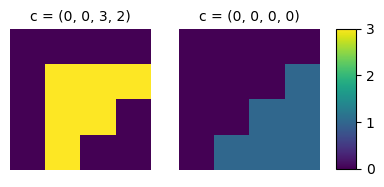

In [31]:
fn.show_tables(tables4, 4)

In [33]:
c = ((0, 0, 3, 2), (0, 1, 1, 1), (0, 2, 3, 0), (0, 3, 1, 3))
table = tables4[c]

In [39]:
n = fn.RecursiveGrpElt((2, 1), table)
m = fn.RecursiveGrpElt((2, 1), table)
(n + m).vals

(3, 3, 2)

## Building Recursive Carrying

In [304]:
from base import BaseRep, CarryTable

In [305]:
n = BaseRep((2, 3), f)
m = BaseRep((1, 3), f)

In [306]:
fp = CarryTable(f)

In [307]:
fp[1, 3]

1

In [308]:
(n + m).vals

TypeError: 'BaseRep' object is not subscriptable

In [203]:
def construct_phi_s(b: int, s: tuple) -> Callable[[tuple], int]:
    def psi_s(n: tuple) -> int:
        return b * n[0] + s(n[1])
    return psi_s

In [154]:
from typing import Callable
def construct_recursive_carry(b: int, f: np.array) -> Callable[[tuple, tuple], int]:
    assert len(f) == b, 'invalid cocycle f'
    def f2(n: tuple, m: tuple) -> int:
        return int((((n[1] + m[1] - (n[1]+m[1])%b) / b**2)
                     + ((n[0] + m[0] - (n[0]+m[0]+f[n[1],m[1]])%b) / b)) % b)
    return f2

In [155]:
f = derive_standard_carry(b)
f2 = construct_recursive_carry(4, f)

In [156]:
n = (2, 0)
m = (1, 0)
f2(n, m)

0

In [197]:
c2 = [(0, 0)] + list(map(tuple, np.random.choice(2, (b**2-1, 2))))

In [198]:
from fn import RecursiveGrpElt
def construct_dc2(b: int, c2: tuple, f: np.array) -> Callable[[tuple, tuple], tuple]:
    assert len(c2) == b**2, 'invalid c2'
    def dc(n: tuple, m: tuple) -> tuple:
        return 

SyntaxError: unexpected EOF while parsing (3888386688.py, line 4)